In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import xarray as xr
from skimage.morphology import binary_erosion
from matplotlib.colors import ListedColormap
import math
import geopy.distance

from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


In [2]:
# data = xr.open_dataset('wave2021.nc')
data = xr.open_dataset('wave2021_tot.nc')
lats = data.variables['latitude'][:]
lons = data.variables['longitude'][:]
times = data.variables['time'][:]
data_stat = xr.open_dataset('MED-MFC_006_017_mask_bathy.nc')
mask = data_stat.variables['mask'][0,:,:]

daymean = data.resample(time='1D').mean(dim='time')
monthmean = data.resample(time='1M').mean(dim='time')
yearmean = data.resample(time='1Y').mean(dim='time')

wavehour = data.variables['VHM0'][:]
waveday = daymean.variables['VHM0'][:]
wavemonth = monthmean.variables['VHM0'][:]
waveyear = yearmean.variables['VHM0'][:]

In [28]:
data.sel(latitude=lats[15]).variables['VHM0'].shape

(8760, 212)

In [30]:
data.sel(latitude=slice(lats[15], lats[18]))

<xarray.Dataset>
Dimensions:    (latitude: 4, time: 8760, longitude: 212)
Coordinates:
  * latitude   (latitude) float32 41.23 41.27 41.31 41.35
  * time       (time) datetime64[ns] 2021-01-01 ... 2021-12-31T23:00:00
  * longitude  (longitude) float32 6.417 6.458 6.5 6.542 ... 15.13 15.17 15.21
Data variables:
    VHM0       (time, latitude, longitude) float32 ...
Attributes: (12/15)
    bulletin_type:                   forecast
    institution:                     Hellenic Centre for Marine Research (HCM...
    source:                          MEDWAM3
    credit:                          Copernicus Marine Environment Monitoring...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    producer:                        CMEMS-MED Monitoring and Forecasting Centre
    ...                              ...
    area:                            MED
    bulletin_date:                   2022-01-07 12
    FROM_ORIGINAL_FILE__field_type:  hourly_instantaneous_at_time_field
    title:                           Wave fields (2D) - Hourly Instantaneous
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    history:                         Data extracted from dataset http://local...

In [36]:
wave_hm = [0 for i in range(len(wavehour))]
wave_dm = [0 for i in range(365)]
wave_mm = [0 for i in range(12)]
for i in range(len(wavehour)):
    wave_hm[i] = np.mean(wavehour[i])
for i in range(365):
    wave_dm[i] = np.mean(waveday[i])
for i in range(12):
    wave_mm[i] = np.mean(wavemonth[i])
wave_ym = np.mean(waveyear)

wave_hm = np.array(wave_hm)
wave_dm = np.array(wave_dm)
wave_mm = np.array(wave_mm)
wave_ym = np.array(wave_ym)

In [28]:
mp = Basemap(projection='merc',
             llcrnrlon=6.4166675, 
             llcrnrlat=40.604168,
             urcrnrlon=15.208334,  
             urcrnrlat=45.5625, 
             resolution='f')
             
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)

In [49]:
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)
# x_min, y_min = mp(lons.values[0], lats.values[0]) 
# x_max, y_max = mp(lons.values[-1], lats.values[-1]) 

In [78]:
p1x, p1y = mp(10.58, 42.73)
p2x, p2y = mp(11.04, 42.52)
p3x, p3y = mp(10.31, 42.33)
p4x, p4y = mp(9.46, 41.69)

<ipython-input-81-134d69841a8e>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, waveyear[0], cmap='jet')
<ipython-input-81-134d69841a8e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(axtik, fontsize=25)


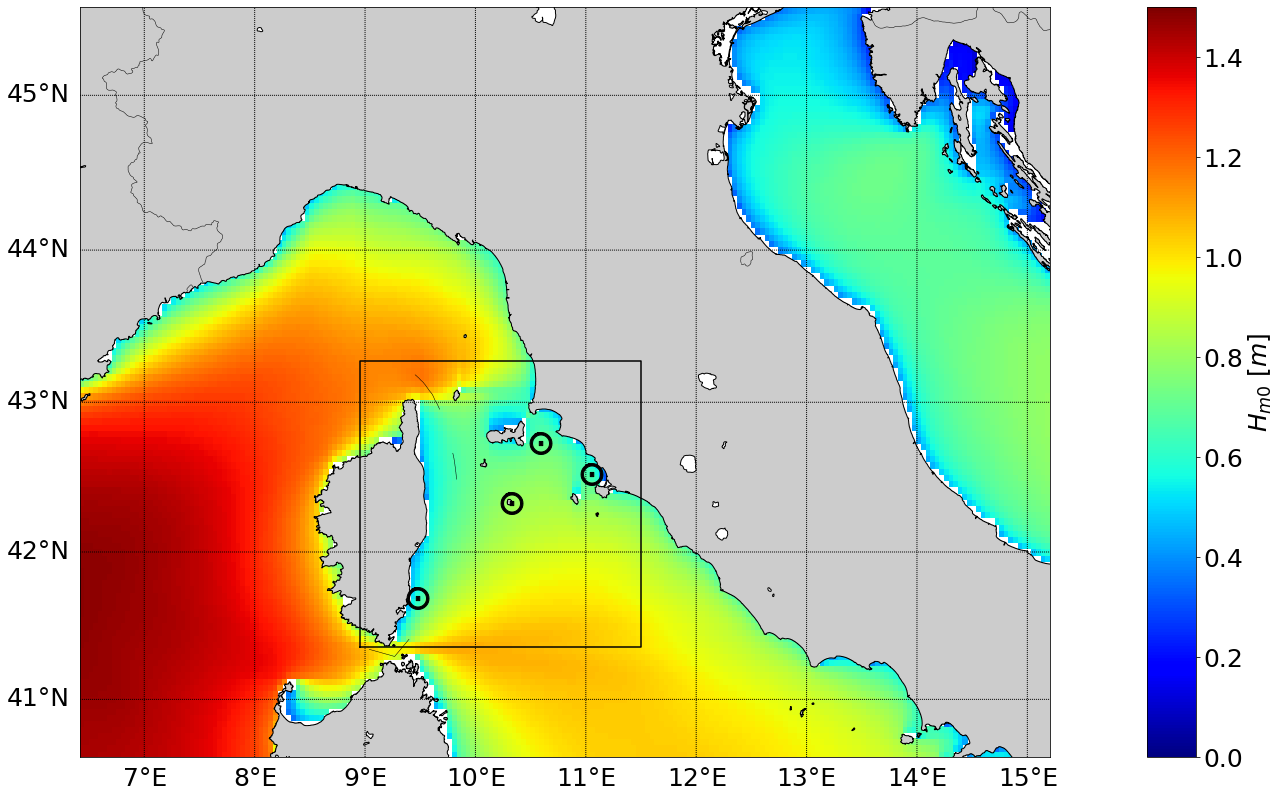

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
plt.plot(p1x, p1y, marker=r'$\odot$', markersize=25, color='black')
plt.plot(p2x, p2y, marker=r'$\odot$', markersize=25, color='black')
plt.plot(p3x, p3y, marker=r'$\odot$', markersize=25, color='black')
plt.plot(p4x, p4y, marker=r'$\odot$', markersize=25, color='black')
mp.scatter(p1x, p1y, marker=r'$\odot$', facecolors='none', edgecolors='black')
c_scheme = mp.pcolor(x, y, waveyear[0], cmap='jet')
mp.fillcontinents()
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location='right', pad='10%')
mp.drawmeridians(np.arange(6,16,1.0),labels=[0,0,0,1], fontsize=25) #longitudes
mp.drawparallels(np.arange(40,46,1.0),labels=[1,0,0,0], fontsize=25) #latitudes
axtik = cbar.ax.get_yticks().tolist()
for i in range(len(axtik)):
    axtik[i] = round(axtik[i],1)
cbar.set_label('$H_{m0}$ $[m]$', fontsize=25)
cbar.ax.set_yticklabels(axtik, fontsize=25)
plt.clim([0, 1.5])
plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.title('Annual mean significant wave height $H_{m0}$ in 2021') 
plt.savefig('annualmeanregofint2.png', dpi=300, bbox_inches='tight')
plt.show()

In [8]:
temp = data.sel(time=slice('2021-06-01', '2021-06-30'))
wavehourjune = temp.variables['VHM0'][:]
wave_hmjune = [0 for i in range(720)]
for i in range(720):
    wave_hmjune[i] = np.mean(wavehourjune[i])
wave_hmjune = np.array(wave_hmjune) 

# wave_hmjune
ax.tick_params(axis='both', labelsize=15)

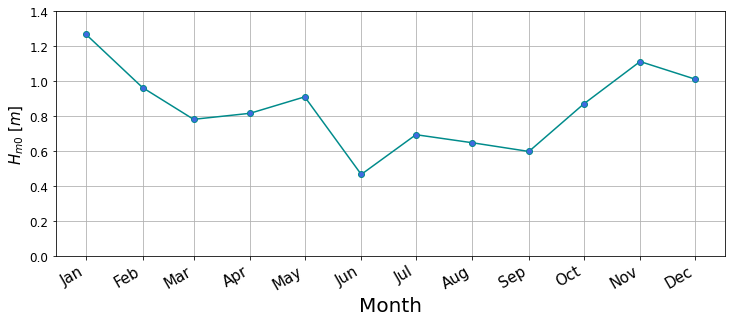

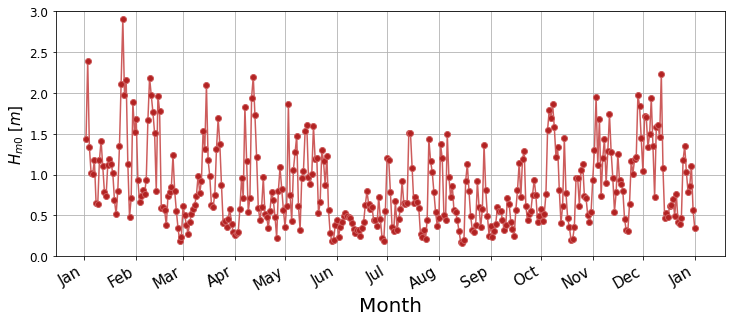

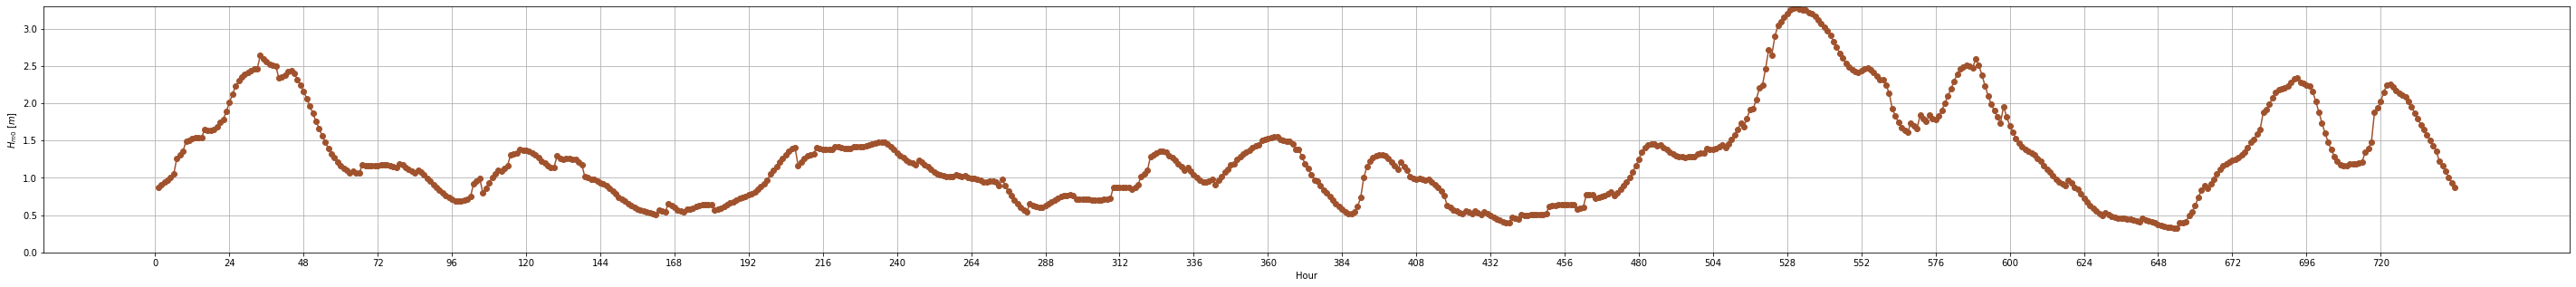

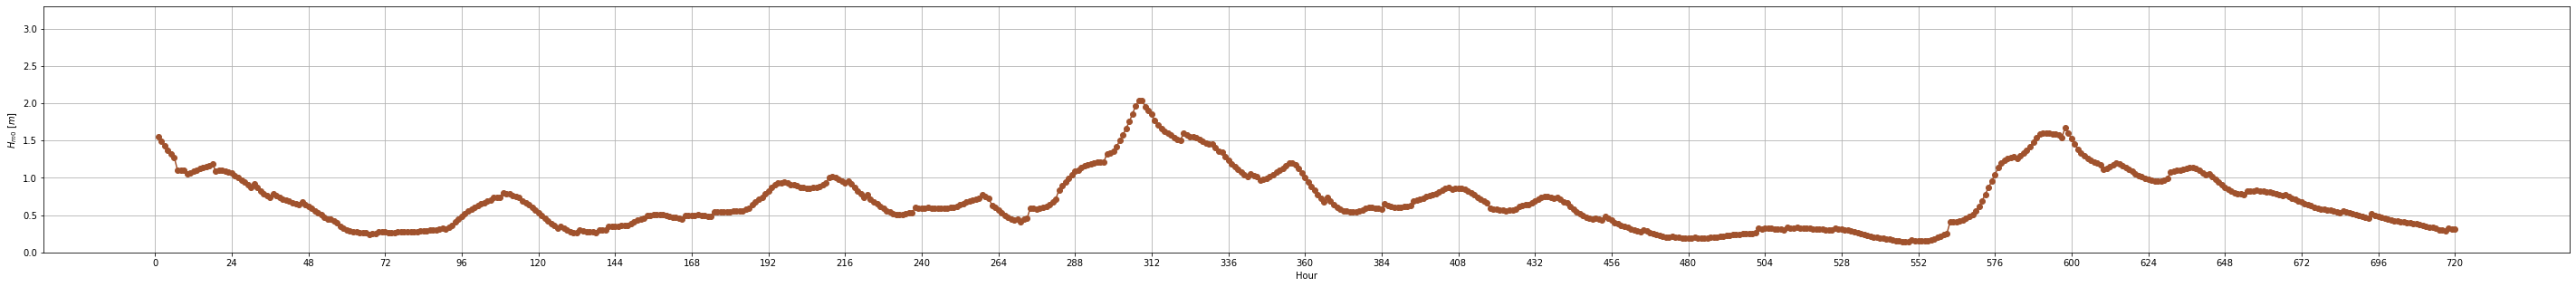

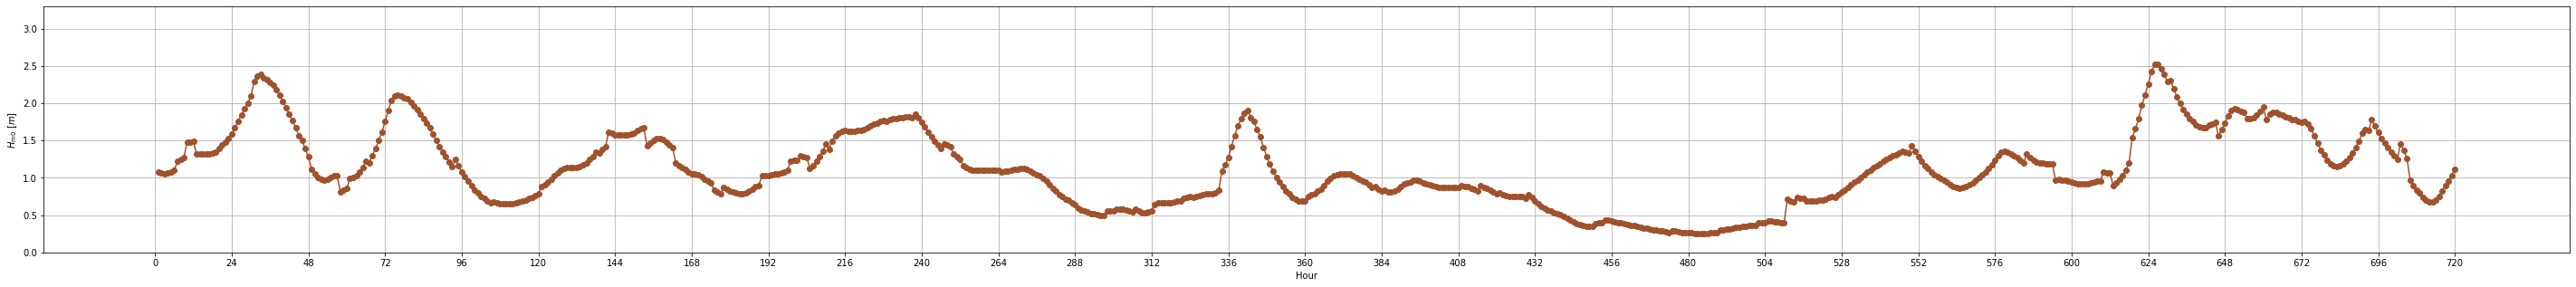

In [127]:
myDates = [datetime(2021,i+1,1) for i in range(12)]
fig, ax = plt.subplots(1,1, figsize=(12, 5))
plt.plot(myDates, wave_mm[:12], marker="o", mfc='royalblue', color="darkcyan")
locator = mdates.MonthLocator()  # every months
fmt = mdates.DateFormatter('%b')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
fig.autofmt_xdate()
plt.grid()
plt.xlabel("Month", fontsize=20)
plt.ylabel("$H_{m0}$ $[m]$", fontsize=15)
# plt.title("Monthly mean significant wave height $H_{m0}$")
plt.ylim(0, 1.4)
# plt.savefig('monthlymean.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(12, 5))
plt.plot(np.arange(1,366,1), wave_dm, marker="o", mfc='firebrick', color="indianred")
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.grid()
fig.autofmt_xdate()
plt.xlabel("Month", fontsize=20)
plt.ylabel("$H_{m0}$ $[m]$", fontsize=15)
# plt.title("Daily mean significant wave height $H_{m0}$")
plt.ylim(0, 3)
# plt.savefig('dailymean.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(50, 5))
plt.plot(np.arange(1,745,1), wave_hm[:744], marker="o", color="sienna")
plt.xlabel("Hour")
major_ticks = np.arange(0, 721, 24)
ax.set_xticks(major_ticks)
plt.ylabel("$H_{m0}$ $[m]$")
ax.grid(which='both')
plt.ylim(0, 3.3)
# plt.title("Hourly mean significant wave height $H_{m0}$ in January")
# plt.savefig('hourmean.png', dpi=500)
plt.show()

# fig, ax = plt.subplots(1,1, figsize=(50, 5))
# plt.plot(np.arange(1,721,1), wave_hmjune, marker="o", color="sienna")
# plt.xlabel("Hour")
# major_ticks = np.arange(0, 721, 24)
# ax.set_xticks(major_ticks)
# plt.ylabel("$H_{m0}$ $[m]$")
# ax.grid(which='both')
# plt.ylim(0, 3.3)
# plt.title("Hourly mean significant wave height $H_{m0}$ in June")
#plt.savefig('hourmeanjune.png', dpi=500)
# plt.show()

fig, ax = plt.subplots(1,1, figsize=(50, 5))
plt.plot(np.arange(1,721,1), wave_hm[4344:5064], marker="o", color="sienna")
plt.xlabel("Hour")
major_ticks = np.arange(0, 721, 24)
ax.set_xticks(major_ticks)
plt.ylabel("$H_{m0}$ $[m]$")
ax.grid(which='both')
plt.ylim(0, 3.3)
# plt.title("Hourly mean significant wave height $H_{m0}$ in July")
# plt.savefig('hourmean.png', dpi=500)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(50, 5))
plt.plot(np.arange(1,721,1), wave_hm[7296:8016], marker="o", color="sienna")
plt.xlabel("Hour")
major_ticks = np.arange(0, 721, 24)
ax.set_xticks(major_ticks)
plt.ylabel("$H_{m0}$ $[m]$")
ax.grid(which='both')
plt.ylim(0, 3.3)
# plt.title("Hourly mean significant wave height $H_{m0}$ in November")
# plt.savefig('hourmean.png', dpi=500)
plt.show()

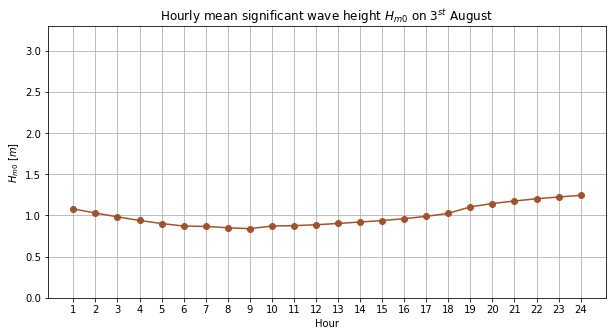

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
plt.plot(np.arange(1,25,1), wave_hm[7392:7392+24], marker="o", color="sienna")
plt.xlabel("Hour")
major_ticks = np.arange(1, 25, 1)
ax.set_xticks(major_ticks)
plt.ylabel("$H_{m0}$ $[m]$")
ax.grid(which='both')
plt.ylim(0, 3.3)
plt.title("Hourly mean significant wave height $H_{m0}$ on $3^{st}$ August")
# plt.savefig('hourmean.png', dpi=500)
plt.show()

In [13]:
mp = Basemap(projection='merc',
             llcrnrlon=6.4166675, 
             llcrnrlat=40.604168,
             urcrnrlon=15.208334,  
             urcrnrlat=45.5625, 
             resolution='f')
             
lon, lat = np.meshgrid(lons, lats)
x, y = mp(lon, lat)



In [12]:
x_min, y_min = mp(8.958334, 41.354168)    # lons.values[650], lats.values[268]
x_max, y_max = mp(11.500001, 43.270832)   # lons.values[711], lats.values[314]

In [13]:
hour = 0
hours = np.arange(0, 24)
for i in hours:
    c_scheme = mp.pcolor(x, y, wavehour[i+6240], cmap='jet')
    mp.fillcontinents(lake_color='aqua')
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()
    mp.drawmeridians(np.arange(6,15,1.0),labels=[0,0,0,1]) #longitudes
    mp.drawparallels(np.arange(40,46,1.0),labels=[1,0,0,0]) #latitudes
    cbar = mp.colorbar(c_scheme, location='right', pad='10%')
    cbar.set_label('$H_{m0}$ $[m]$')
    #plt.clim(0, 1.7)
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
    plt.title('Significant wave height $H_s$ on 18-09-2021 ' + str(hour) + ':00 Ligurian Sea') 
    plt.savefig(r'.\Images' + '\\wave1july' + str(hour) + '.jpg', dpi=300)
    hour = i+1
    plt.clf()
plt.show()

<ipython-input-13-909d6fbaf0f4>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, wavehour[i+6240], cmap='jet')


<Figure size 432x288 with 0 Axes>

In [64]:
# plt.figure(1, figsize=(10, 7))
# mp.pcolor(x, y, wavehour[4344], cmap='jet')
# mp.fillcontinents(lake_color='aqua')
# mp.drawcoastlines()
# mp.drawstates()
# mp.drawcountries()
# mp.drawmeridians(np.arange(6,15,1.0),labels=[0,0,0,1]) #longitudes
# mp.drawparallels(np.arange(40,46,1.0),labels=[1,0,0,0]) #latitudes
# cbar = mp.colorbar(c_scheme, location='right', pad='10%')
# cbar.set_label('$H_{m0}$ $[m]$')
# plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.title('Significant wave height $H_s$ on 1-07-2021 0:00 Ligurian Sea')
# # plt.savefig('wave1july.png', dpi=500)

# plt.show()

In [23]:
l = 24
cost = [np.zeros_like(wavehour[1560]) for i in range(24)]
contour_raw_meteo = [np.zeros_like(wavehour[1560]) for i in range(24)]
contour_raw_land = np.logical_xor(mask,binary_erosion(mask)) 
for i in range(l):
    cost[i] = 100 * (np.array(wavehour[i+1560]) > 0.8)
    contour_raw_meteo[i]=np.logical_xor(cost[i],binary_erosion(cost[i]))

In [24]:
# plt.figure(1, figsize=(10, 7))
# mp.pcolor(x, y, cost[10], cmap=ListedColormap(['white', 'red']))
# mp.fillcontinents(lake_color='aqua')
# mp.drawcoastlines()
# mp.drawstates()
# mp.drawcountries()
# mp.drawmeridians(np.arange(6,15,1.0),labels=[0,0,0,1]) #longitudes
# mp.drawparallels(np.arange(40,46,1.0),labels=[1,0,0,0]) #latitudes
# plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
# plt.title('Wave cost on 1-07-2021 0:00 Ligurian Sea')
# # plt.savefig('wave1july.png', dpi=500)
# plt.show()

hour = 0
hours = np.arange(0, 24)
for i in hours:
    c_scheme = mp.pcolor(x, y, cost[i], cmap=ListedColormap(['white', 'red']))
    mp.fillcontinents(lake_color='aqua')
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()
    mp.drawmeridians(np.arange(6,15,1.0),labels=[0,0,0,1]) #longitudes
    mp.drawparallels(np.arange(40,46,1.0),labels=[1,0,0,0]) #latitudes
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-k")
    plt.title('Significant wave height $H_s$ on 23-10-2021 ' + str(hour) + ':00 Ligurian Sea') 
    plt.savefig(r'.\Images' + '\\wave1cost' + str(hour) + '.jpg', dpi=300)
    hour = i+1
    plt.clf()
plt.show()

<ipython-input-24-307021abadf2>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, cost[i], cmap=ListedColormap(['white', 'red']))


<Figure size 432x288 with 0 Axes>

In [129]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
from itertools import chain

# wave_day = [[0 for i in range(62*47)] for i in range(365)]
# for i in range(365):
#     wave_day[i] = list(set(chain(*np.array(waveday[i]))))

In [265]:
np.mean(waveyear)

<xarray.Variable ()>
array(0.84628826, dtype=float32)

In [240]:
wave_hm

array([0.8737712 , 0.9092407 , 0.9412506 , ..., 0.38024542, 0.42228276,
       0.4619504 ], dtype=float32)

C:\Users\giorg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


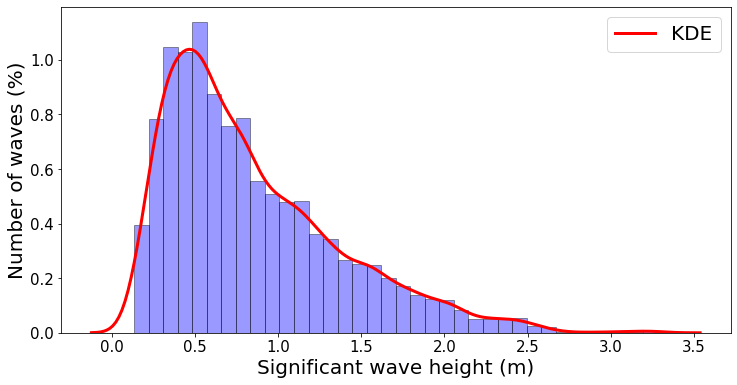

In [278]:
# seaborn histogram
fig, ax = plt.subplots(1,1, figsize=(12, 6))
sns.distplot(wave_hm, hist=True, kde=True,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}) 
# Add labels
# ax.set_title('Hourly mean distribution of $H_{m0}$ in 2021', fontsize=20)
sns.kdeplot(wave_hm, label="KDE", color="red", linewidth='3')
# plt.axvline(x=wave_ym, ymin=0,ymax=1, color='k', linestyle='--', label='$H_{m0}$')
ax.set_xlabel('Significant wave height (m)', fontsize=20)
ax.set_ylabel('Number of waves (%)', fontsize=20)
ax.tick_params(axis='both', labelsize=15)
# plt.text(0.9, 0.7, 'Mean $H_{m0}=0.85$ m',fontsize=18,
#                     ha='left',va='bottom',color='k')
plt.legend(fontsize=20)
plt.savefig('histogramhourlymean.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\giorg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\giorg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


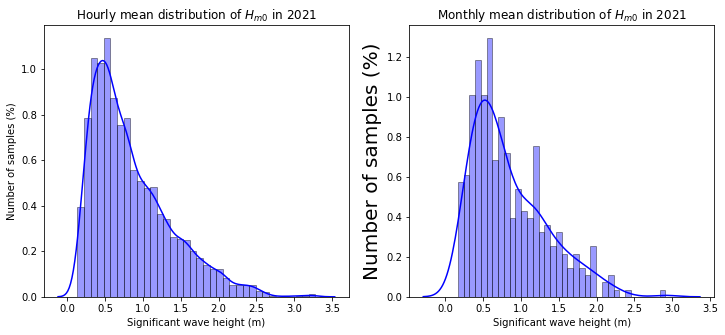

In [132]:
# seaborn histogram
fig, ax = plt.subplots(1,2, figsize=(12, 5))
sns.distplot(wave_hm, hist=True, kde=True, norm_hist = False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}, ax=ax[0])
# Add labels
ax[0].set_title('Hourly mean distribution of $H_{m0}$ in 2021')
ax[0].set_xlabel('Significant wave height (m)')
ax[0].set_ylabel('Number of samples (%)')

sns.distplot(wave_dm, hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'}, ax=ax[1])

ax[1].set_title('Monthly mean distribution of $H_{m0}$ in 2021')
ax[1].set_xlabel('Significant wave height (m)')
ax[1].set_ylabel('Number of samples (%)', fontsize=20)
# plt.savefig('histogram.png', dpi=500)
plt.show()


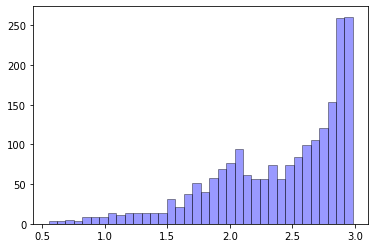

In [58]:
sns.distplot(wave_day[1], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()

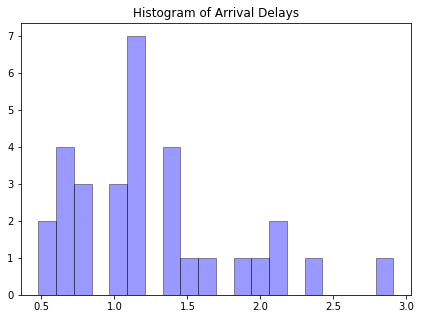

In [83]:
len(wave_dm[:31])

plt.figure(1, figsize=(7, 5))
sns.distplot(wave_dm[:31], hist=True, kde=False, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('Histogram of Arrival Delays')
plt.show()

In [6]:
data = xr.open_dataset('wave2021.nc')
lats = data.variables['latitude'][:]
lons = data.variables['longitude'][:]
times = data.variables['time'][:]
data_stat = xr.open_dataset('MED-MFC_006_017_mask_bathy.nc')
mask = data_stat.variables['mask'][0,:,:]

#temp = data.sel(time=slice('2021-12-01', '2021-12-31'))
daymean = data.resample(time='1D').mean(dim='time')
monthmean = data.resample(time='1M').mean(dim='time')
yearmean = data.resample(time='1Y').mean(dim='time')

wavehour = data.variables['VHM0'][:]
waveday = daymean.variables['VHM0'][:]
wavemonth = monthmean.variables['VHM0'][:]
waveyear = yearmean.variables['VHM0'][:]

In [22]:
portov_lon = data["VHM0"]["longitude"].values[11]
portov_lat = data["VHM0"]["latitude"].values[6]
print("Point coordinates of Portovecchio are:\n", portov_lon, portov_lat)

Point coordinates of Portovecchio are:
 9.416668 41.604168


In [29]:
wavelocationh = data["VHM0"].sel(longitude = portov_lon, latitude = portov_lat)
wavelocationd = daymean["VHM0"].sel(longitude = portov_lon, latitude = portov_lat)
wavelocationm = monthmean["VHM0"].sel(longitude = portov_lon, latitude = portov_lat)
wavelocationy = yearmean["VHM0"].sel(longitude = portov_lon, latitude = portov_lat)

In [32]:
wave_lochm = [0 for i in range(len(wavelocationh))]
wave_locdm = [0 for i in range(365)]
wave_locmm = [0 for i in range(12)]
for i in range(len(wavelocationh)):
    wave_lochm[i] = np.mean(wavelocationh[i])
for i in range(365):
    wave_locdm[i] = np.mean(wavelocationd[i])
for i in range(12):
    wave_locmm[i] = np.mean(wavelocationm[i])
wave_locym = np.mean(wavelocationy)

wave_lochm = np.array(wave_lochm)
wave_locdm = np.array(wave_locdm)
wave_locmm = np.array(wave_locmm)
wave_locym = np.array(wave_locym)

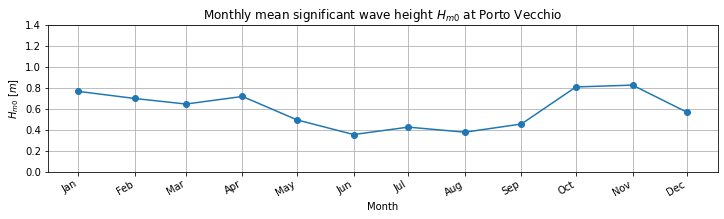

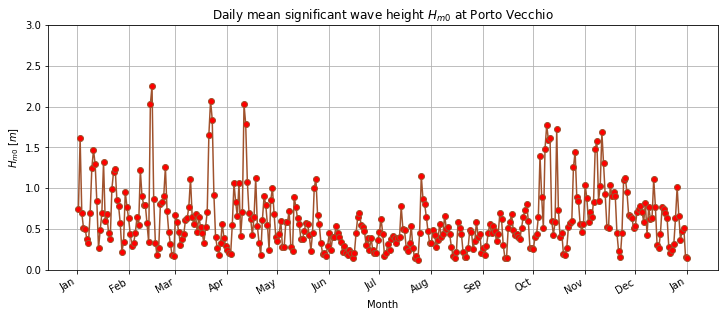

In [42]:
myDates = [datetime(2021,i+1,1) for i in range(12)]
fig, ax = plt.subplots(1,1, figsize=(12, 3))
plt.plot(myDates, wave_locmm[:12], marker="o")
locator = mdates.MonthLocator()  # every months
fmt = mdates.DateFormatter('%b')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
fig.autofmt_xdate()
plt.grid()
plt.xlabel("Month")
plt.ylabel("$H_{m0}$ $[m]$")
plt.title("Monthly mean significant wave height $H_{m0}$ at Porto Vecchio")
plt.ylim(0, 1.4)
plt.savefig('monthlymeanportov.png', dpi=500)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(12, 5))
plt.plot(np.arange(1,366,1), wave_locdm, marker="o", mfc='r', color="sienna")
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.grid()
fig.autofmt_xdate()
plt.xlabel("Month")
plt.ylabel("$H_{m0}$ $[m]$")
plt.title("Daily mean significant wave height $H_{m0}$ at Porto Vecchio")
plt.ylim(0, 3)
plt.savefig('dailymeanportov.png', dpi=500)
plt.show()

# Analysis results

In [217]:
# for i in range(len(t_travel)): # 1 found path, 0 failed
#     if t_travel[i]:
#         success_ratio[i] = 100
#         planning_ratio[i] = 100
#     else:
#         pass

In [68]:
from itertools import product
alg = ['RRT*', 'A*', 'APF']
plan = ['Summing', 'Global', 'Local']
day = ['Day1', 'Day2', 'Day3', 'Day4', 'Day5']
surv = [1,2]
# t_travel = [9.93, 9.49, None, 10.10, 10.10, None, 9.70, 10.15, None, ]
# , 'Travel time':t_travel, 'Computational time': er2
data = pd.DataFrame(data={'Algorithm': alg, 'Planning type': plan})

[(x, y) for x in range(5) for y in range(5)]

def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

dictionary = {'Algorithm': ['RRT*', 'A*', 'APF'], 
              'Planning type':  ['Summing', 'Global', 'Local'], 
              'Day': ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7', 'Day8', 'Day9', 'Day10','Day11', 'Day12'], 
              'Survey': [1,2]}
df = expand_grid(dictionary)
t_travel=[None, None, 10.95, 9.01, 11.01, 8.98, 10.76, 8.83, None, None,
          11.39, 9.22, None, None, None, None, None, None, 12.19,9.16,
          10.71, 8.94, 10.26, 8.53,
         9.93, 8.76, 9.13, 8.59, 10.10, 8.78, None, None, 9.99, None,
          10.12, 8.69, None, 8.60, None, None, None, None, None, 9.20, 
          10.17, 8.70, 9.64, 8.46,
         9.49, 8.51, 9.07, 8.56, 10.08, 8.94, 10.25, 8.61, 9.99, 8.47,
          10.48, 8.64, 10.94, 8.99, 9.77, 8.69, 9.20, 9.44, 9.52, 8.75,
          9.93, 8.66, 9.82, 8.46,
         None, None, 11.75, 9.78, 12.27, 9.79, 11.24, 9.28, None, None,
          12.39, 9.91, None, None, None, None, None, None, 12.65, None,
          11.11, 9.40, 10.22, 8.77,
         10.10, 8.65, 9.98, 8.52, 10.99, 9.53, None, None, None, 8.52,
          None, None, None, 9.08, 10.62, 9.15, None, None, None, 9.41,
          10.62, 9.15, 10.23, 8.52,
         10.10, 8.65, 9.98, 8.52, 10.99, 9.53, 10.47, 9.03, 10.35, 8.65,
          10.99, 9.28, 11.76, 9.54, 10.62, 9.15, 9.98, 9.93, 10.51, 9.41,
          10.75, 9.28, 9.97, 8.52,
         None, None, 11.63, 9.56, 11.78, 9.35, 11.13, 9.36, None, None,
          12.37, 9.41, None, None, None, None, None, None, 12.95, 10.19,
          10.68, 8.86, 11.43, 8.48,
         9.70, 8.39, 8.80, 8.11, 10.23, 8.74, None, 9.22, None, None,
          None, None, 11.05, 9.07, 9.76, 8.63, 9.02, None, 9.77, None,
          None, 8.63, None, 8.10,
         10.15, 8.30, 9.00, 8.11, 10.10, 9.45, 10.62, 8.70, 10.61, 8.30,
          11.04, 8.87, 12.22, 9.28, 9.83, 8.68, 9.24, 10.40, 9.94, 9.47,
          9.84, 8.70, 10.28, 8.09
         ]

t_exec = [None, None, 5.125, 3.984, 7.037, 3.922, 9.617, 2.807, None, None,
          9.110, 8.530, None, None, None, None, None, None, 8.564, 4.868,
          2.579, 2.170, 7.264, 3.651,
         35.361, 28.301, 60.924, 40.481, 51.197, 31.26, None, None, 65.404, None,
          41.879, 24.212, None, 13.225, None, None, None, None, None, 34.369,
          20.350, 66.402, 93.385, 17.802,
         11.053, 10.719, 12.595, 9.615, 6.240, 4.550, 8.346, 6.085, 12.013, 8.093,
          6.675, 5.805, 9.918, 13.051, 10.483, 6.476, 8.186, 11.167, 12.979, 8.913,
          3.285, 2.424, 6.704, 6.045,
         None, None, 3.597, 3.610, 3.690, 3.951, 3.305, 3.620, None, None,
          1.138, 1.295, None, None, None, None, None, None, 2.716, None, 
          1.192, 1.096, 2.288, 2.225, 
         35.100, 31.229, 41.236, 36.585, 39.342, 36.032, None, None, None, 67.510,
          None, None, None, 21.142, 19.060, 17.717, None, None, None, 16.854,
          13.026, 12.040, 27.478, 24.296,
         3.361, 3.198, 4.157, 4.360, 3.421, 3.647, 4.028, 4.333, 7.469, 6.111,
          3.763, 3.747, 4.39, 4.38, 3.980, 4.021, 4.236, 3.901, 3.905, 4.030, 
          3.164, 3.259, 3.195, 3.279,
         None, None, 1.016, 0.756, 1.024, 0.638, 1.140, 0.953, None, None,
          0.286, 0.236, None, None, None, None, None, None, 0.650, 0.540,
          0.236, 0.195, 0.575, 0.540,
         4.262, 3.912, 11.195, 5.103, 4.029, 4.611, None, 3.786, None, None,
          None, None, 7.092, 5.077, 2.977, 2.244, 2.633, None, 4.856, None, 
          None, 1.844, None, 1.308, 
         0.722, 0.951, 0.767, 0.690, 0.661, 0.668, 1.259, 0.827, 1.381, 1.237,
         0.809, 0.636, 0.565, 0.427, 0.937, 0.514, 0.705, 0.816, 0.724, 0.656,
         0.470, 0.376, 0.683, 0.460]
success_ratio = np.zeros_like(t_travel)
for i in range(len(t_travel)): # 1 found path, 0 failed
    if t_travel[i]:
        success_ratio[i] = 100
        planning_ratio[i] = 100
    else:
        if df['Planning type'][i] == 'Global':
            success_ratio[i] = 0
            planning_ratio[i] = 100
            
        if df['Planning type'][i] == 'Summing':
            success_ratio[i] = 100
            planning_ratio[i] = 0           
        

# planning_ratio = np.zeros_like(t_travel)
# for i in range(len(t_travel)): # 1 found path, 0 failed
#     if t_travel[i]:
#         if df['Planning type'][i] == 'Summing' or df['Planning type'][i] == 'Global':
#             planning_ratio[i] = 1
#         else:
#             planning_ratio[i] = 0
            
        
pd.set_option("display.max_rows", None, "display.max_columns", None)
df['Travel success ratio (%)'] = success_ratio
df['Path planning success ratio (%)'] = planning_ratio
df['Travel time (h)'] = t_travel/max(t_travel)
df['Computing time (s)'] = t_exec 
df

,Algorithm,Planning type,Day,Survey,Travel success ratio (%),Path planning success ratio (%),Travel time (h),Computing time (s)
0,RRT*,Summing,Day1,1,100,0,NaN,NaN
1,RRT*,Summing,Day1,2,100,0,NaN,NaN
2,RRT*,Summing,Day2,1,100,100,10.95,5.125
3,RRT*,Summing,Day2,2,100,100,9.01,3.984
4,RRT*,Summing,Day3,1,100,100,11.01,7.037
5,RRT*,Summing,Day3,2,100,100,8.98,3.922
6,RRT*,Summing,Day4,1,100,100,10.76,9.617
7,RRT*,Summing,Day4,2,100,100,8.83,2.807
8,RRT*,Summing,Day5,1,100,0,NaN,NaN
9,RRT*,Summing,Day5,2,100,0,NaN,NaN


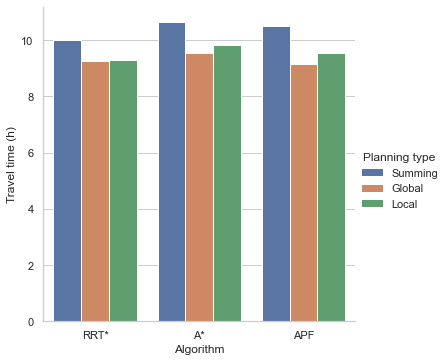

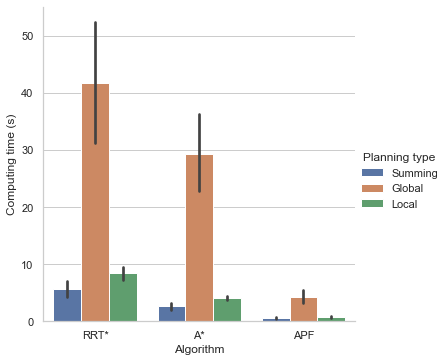

In [143]:
sns.set_theme(style="whitegrid")
sns.catplot(x="Algorithm", y="Travel time (h)", hue="Planning type", kind="bar", data=df, ci=None)
# plt.savefig("tcomp_new.png", dpi=300,bbox_inches='tight')
plt.show()
sns.catplot(x="Algorithm", y="Computing time (s)", hue="Planning type", kind="bar", data=df)
# plt.savefig("texec_new.png", dpi=300,bbox_inches='tight')
plt.show()


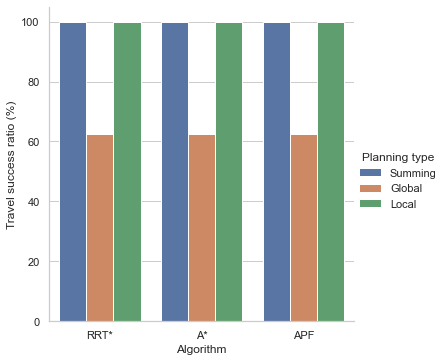

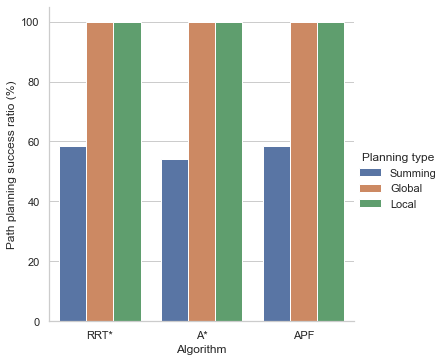

In [99]:
sns.set_theme(style="whitegrid")
sns.catplot(x="Algorithm", y="Travel success ratio (%)", hue="Planning type", kind="bar", data=df, ci=None)
# plt.ylim(0, 0.5)
plt.savefig("success_new.png", dpi=300,bbox_inches='tight')
plt.show()

sns.set_theme(style="whitegrid")
sns.catplot(x="Algorithm", y="Path planning success ratio (%)", hue="Planning type", kind="bar", data=df, ci=None)
# plt.ylim(0, 0.5)
plt.savefig("planning_new.png", dpi=300,bbox_inches='tight')
plt.show()

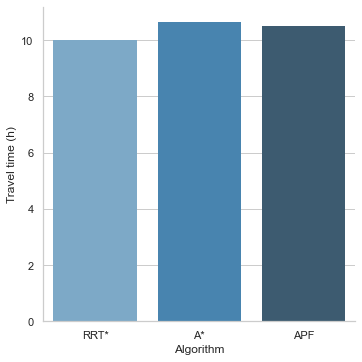

In [161]:
summing_df = df.loc[df['Planning type'] == "Summing"]


sns.set_theme(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.0})
sns.catplot(x="Algorithm", y="Travel time (h)", kind="bar", data=summing_df, ci=None, palette="Blues_d")
plt.savefig("summingbar.png", dpi=300, bbox_inches='tight')
plt.show()



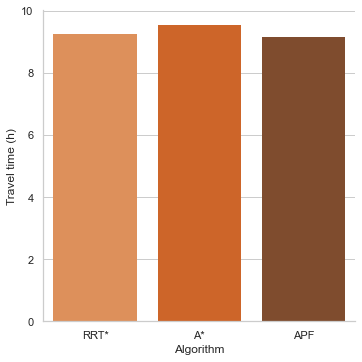

In [162]:
global_df = df.loc[df['Planning type'] == "Global"]

sns.set_theme(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.0})
sns.catplot(x="Algorithm", y="Travel time (h)", kind="bar", data=global_df, ci=None, palette="Oranges_d")
plt.savefig("globalbar.png", dpi=300,bbox_inches='tight')
plt.show()

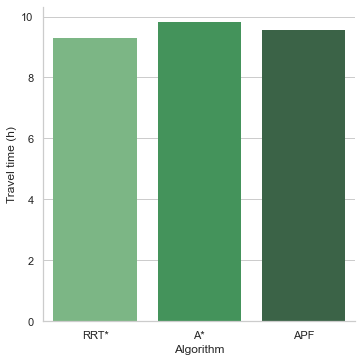

In [163]:
local_df = df.loc[df['Planning type'] == "Local"]

sns.set_theme(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.0})
sns.catplot(x="Algorithm", y="Travel time (h)", kind="bar", data=local_df, ci=None, palette="Greens_d")
plt.savefig("localbar.png", dpi=300, bbox_inches='tight')
plt.show()

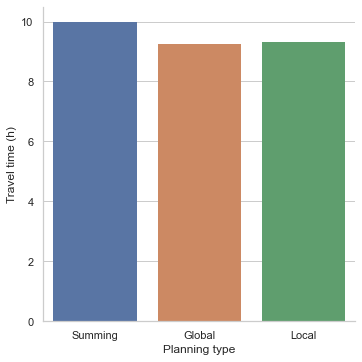

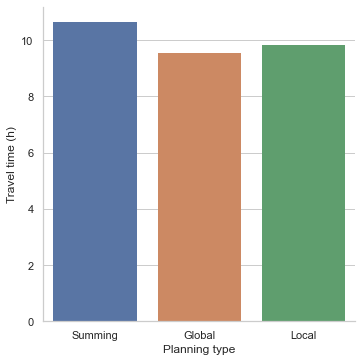

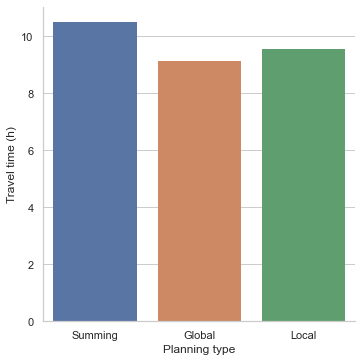

In [169]:
rrt_df = df.loc[df['Algorithm'] == "RRT*"]
astar_df = df.loc[df['Algorithm'] == "A*"]
apf_df = df.loc[df['Algorithm'] == "APF"]

sns.set_theme(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.0})
sns.catplot(x="Planning type", y="Travel time (h)", kind="bar", data=rrt_df, ci=None)
plt.savefig("rrtbar.png", dpi=300, bbox_inches='tight')
plt.show()

sns.set_theme(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.0})
sns.catplot(x="Planning type", y="Travel time (h)", kind="bar", data=astar_df, ci=None)
plt.savefig("astarbar.png", dpi=300, bbox_inches='tight')
plt.show()

sns.set_theme(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.0})
sns.catplot(x="Planning type", y="Travel time (h)", kind="bar", data=apf_df, ci=None)
plt.savefig("apfbar.png", dpi=300, bbox_inches='tight')
plt.show()

In [564]:
# alg = ['RRT*', 'A*', 'APF']
# plan = ['Summing', 'Global', 'Local']
# day = ['Day1', 'Day2', 'Day3', 'Day4', 'Day5']
# surv = [1,2]
# t_travel = [9.93, 9.49, None, 10.10, 10.10, None, 9.70, 10.15, None, ]
# , 'Travel time':t_travel, 'Computational time': er2
data_sum_astar = pd.DataFrame(data={'Algorithm': [""],'Travel time (h)': [np.nanmean(summing_df.loc[df.loc[df['Planning type'] == "Summing"]['Algorithm'] == "A*"]["Travel time (h)"])], "Variation wrt the shortest path": [0]})
data_sum_rtt = pd.DataFrame(data={'Algorithm': [""],'Travel time (h)': [np.nanmean(summing_df.loc[df.loc[df['Planning type'] == "Summing"]['Algorithm'] == "RRT*"]["Travel time (h)"])], "Variation wrt the shortest path": [0]})
data_sum_apf = pd.DataFrame(data={'Algorithm': [""],'Travel time (h)': [np.nanmean(summing_df.loc[df.loc[df['Planning type'] == "Summing"]['Algorithm'] == "APF"]["Travel time (h)"])], "Variation wrt the shortest path": [0]})

min_mean = min([data_sum_astar["Travel time (h)"][0],data_sum_rtt["Travel time (h)"][0],data_sum_apf["Travel time (h)"][0]])
data_sum_astar["Variation wrt the shortest path"]= (((data_sum_astar["Travel time (h)"][0] - min_mean)*100)/min_mean)+100
data_sum_rtt["Variation wrt the shortest path"]= (((data_sum_rtt["Travel time (h)"][0] - min_mean)*100)/min_mean)+100
data_sum_apf["Variation wrt the shortest path"]= (((data_sum_apf["Travel time (h)"][0] - min_mean)*100)/min_mean)+100

In [565]:
data_sum_astar

,Algorithm,Travel time (h),Variation wrt the shortest path
0,,10.658462,106.630314


In [566]:
data_sum_rtt

,Algorithm,Travel time (h),Variation wrt the shortest path
0,,9.995714,100.0


In [567]:
data_sum_apf

,Algorithm,Travel time (h),Variation wrt the shortest path
0,,10.512857,105.173646


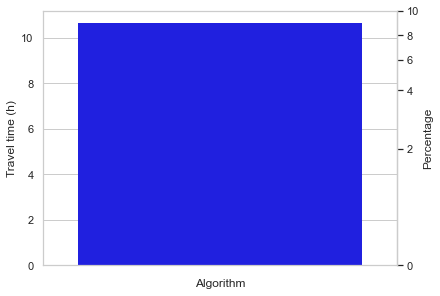

In [569]:
import matplotlib.patches as mpatches
from matplotlib.ticker import AutoMinorLocator
# set plot style: grey grid in the background:
sns.set(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.0})

# set the figure size
fig, ax = plt.subplots(constrained_layout=True)
xdata = np.arange(1, 11, 0.4)
ydata = np.random.randn(len(xdata))
# ax.plot(xdata, ydata, label='Plotted data')

# ax.set_xlabel('angle [degrees]')
# bar chart 1 -> top bars (group of 'smoker=No')
xold = np.arange(0, 11, 0.2)
# fake data set relating x coordinate to another data-derived coordinate.
# xnew must be monotonic, so we sort...
xnew = np.sort(10 * np.exp(-xold / 4) + np.random.randn(len(xold)) / 3)
def forward(x):
    return np.interp(x, xold, xnew)

def inverse(x):
    return np.interp(x, xnew, xold)
ax = sns.barplot(x="Algorithm",  y="Travel time (h)", data=data_sum_astar, color='blue')
# ax.plot(xold[3:], xnew[3:], label='Transform data')
# ax.set_xlabel('X [m]')

ax1 = ax.secondary_yaxis('right', functions=(forward, inverse))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.set_ylabel('Percentage')
# ax1.set_ylabel("Percentage")
# ax1.set_ylim(100,150)

# ax = sns.barplot(x="Algorithm",  y="Mean", data=data_sum_astar, color='blue')

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# ax = sns.barplot(x="Algorithm", y="Mean", data=data_sum_apf, ci=None,  color='orange')

# ax = sns.barplot(x="Algorithm", y="Mean", data=data_sum_rtt, ci=None,  color='green')

# ax1 = ax.secondary_yaxis('right')
# ax1.set_ylabel("Percentage")
# ax1.set_ylim(0,1)

# ax1 = sns.barplot(x="Algorithm",  y="Percentage", data=data_sum_astar, color='darkblue')

# # bar chart 2 -> bottom bars (group of 'smoker=Yes')
# ax1 = sns.barplot(x="Algorithm", y="Percentage", data=data_sum_apf, ci=None,  color='orange')

# ax1 = sns.barplot(x="Algorithm", y="Percentage", data=data_sum_rtt, ci=None,  color='lightblue')
# # ax1.set_ylim(100,150)

# add legend
# top_bar = mpatches.Patch(color='darkblue', label='astar')
# bottom_bar2 = mpatches.Patch(color='lightblue', label='rrt')
# bottom_bar = mpatches.Patch(color='orange', label='apf')

# ax.legend(handles=[top_bar, bottom_bar,bottom_bar2])

plt.show()

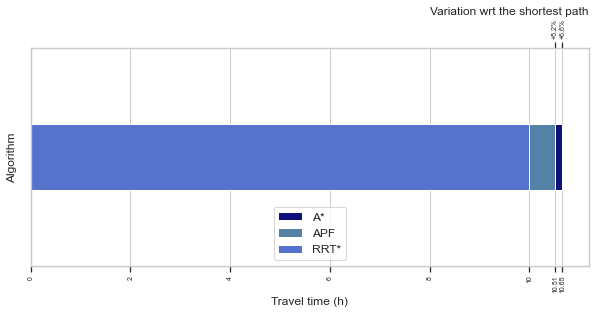

In [612]:
f, ax = plt.subplots(figsize=(10,4))
# ax1.tick_params(axis ='y', labelcolor = 'black') 
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="Algorithm",  x="Travel time (h)", data=data_sum_astar, ci=None, color='green', label='A*')

ax = sns.barplot(y="Algorithm", x="Travel time (h)", data=data_sum_apf, ci=None,  color='orange', label='APF')

ax = sns.barplot(y="Algorithm", x="Travel time (h)", data=data_sum_rtt, ci=None,  color='steelblue', label='RRT*')

# ax = sns.barplot(y="Algorithm", x="Percentage", data=data_sum_astar, ci=None, color='red', label='a*')

# ax = sns.barplot(y="Algorithm", x="Percentage", data=data_sum_apf, ci=None,  color='orange',  label='rrt*')

# ax = sns.barplot(y="Algorithm", x="Percentage", data=data_sum_rtt, ci=None,  color='dodgerblue', label='a*')
plt.xticks(rotation=90)
ax2 = ax.twiny() 
# ax2 = ax.secondary_yaxis('right')

ax2 = sns.barplot(y="Algorithm",  x="Variation wrt the shortest path", data=data_sum_astar, ci=None, color='darkblue', label='A*')

ax2 = sns.barplot(y="Algorithm", x="Variation wrt the shortest path", data=data_sum_apf, ci=None, color='steelblue', label='APF')

ax2 = sns.barplot(y="Algorithm", x="Variation wrt the shortest path", data=data_sum_rtt, ci=None, color='royalblue', label='RRT*')

# ax2 = sns.barplot(x="Algorithm",  y="Percentage", data=data_sum_astar, color='darkblue')
# ax2.tick_params(axis ='y', labelcolor = 'green') 
# ax2.set_ylim(100,110)

# Show plot
# ax.legend()
# ax.set(xlim=(10, 13))


def change_width_horizontal(ax, new_value) :
    
    for patch in ax.patches :
        
        current_height = patch.get_height()
        diff = current_height - new_value

        # we change the bar width
        patch.set_height(new_value)

        # we recenter the bar
        patch.set_y(patch.get_y() + diff * .5)
        
change_width_horizontal(ax, 0.3)  
change_width_horizontal(ax2, 0.3)  
ax.set_xticks([0,2,4,6,8,10,10.51,10.65])
ax.set_xticklabels([0,2,4,6,8,10,10.51,10.65], fontsize=7)
ax2.set_xticks([105.17, 106.63])
# ax2.set_xlabel("Percentage (%)")
# ax.set_xticks([0,2,4,6,8,10,10.5])
ax2.set_xticklabels([105.17, 106.63], fontsize=7)
# ax.set_xlim(0,12)
# ax2.set_xlim(0,107)
# ax2.set(xlim=(100, 120))
# sns.despine(left=True, bottom=True)
a=ax2.get_xticks().tolist()

a[0]='+5.2%'
a[1]='+6.6%'
ax2.set_xticklabels(a)
plt.xticks(rotation=90)
ax2.set_xlabel('Variation wrt the shortest path', loc='right')
plt.legend(prop={"size":12}, loc="lower center")
plt.savefig("variationsum.png", dpi=300, bbox_inches='tight')
plt.show()

In [546]:
a

[100, 105, 110]

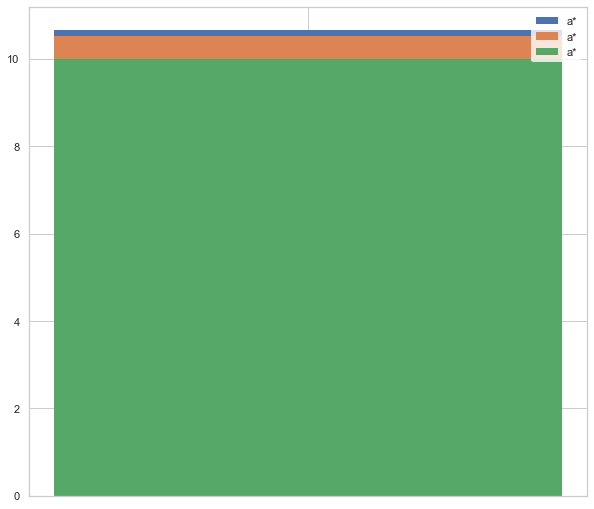

In [462]:
f, ax = plt.subplots(figsize=(10, 9))
plt.bar(data_sum_astar["Algorithm"],data_sum_astar["Mean"],1, label='a*')
plt.bar(data_sum_apf["Algorithm"],data_sum_apf["Mean"],1, label='a*')
plt.bar(data_sum_rtt["Algorithm"],data_sum_rtt["Mean"],1, label='a*')
ax.legend()

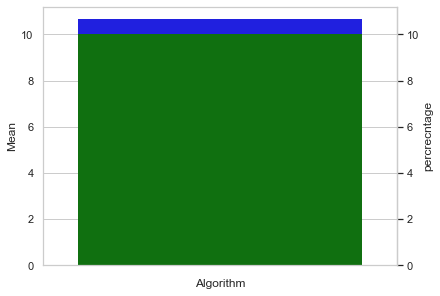

In [352]:
fig, ax = plt.subplots(constrained_layout=True)
ax = sns.barplot(x="Algorithm",  y="Mean", data=data_sum_astar, color='blue')

ax = sns.barplot(x="Algorithm", y="Mean", data=data_sum_rtt, ci=None,  color='green')
# def forward(x):
#     return np.interp(x, xold, xnew)


# def inverse(x):
#     return np.interp(x, xnew, xold)


secax = ax.secondary_yaxis('right')

# secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_ylabel('percrecntage')

plt.show()

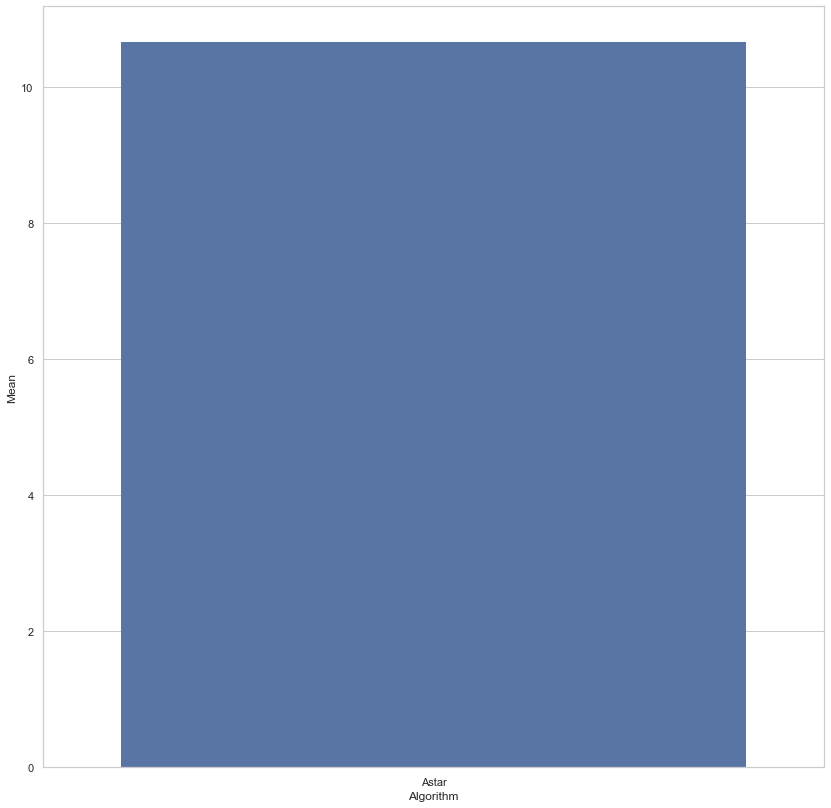

In [235]:
plt.figure(figsize=(14, 14))
sns.set_theme(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.0})
sns.barplot(x="Algorithm", y="Mean", data=data_sum_astar, ci=None)

sns.set_theme(style="whitegrid")
sns.set_context(rc = {'patch.linewidth': 0.0})
sns.barplot(x="Algorithm", y="Mean", data=data_sum_rtt, ci=None)
#plt.savefig("apfbar.png", dpi=300, bbox_inches='tight')
plt.show()